# Introduction

Bicycle sharing is popular these days due to its effective and sustainable mode of transportation. Bay Wheels, a bike-sharing firm based in the San Francisco Bay Area, faces a dock saturation challenge, which is preventing customers from returning their bikes. This issue has a significant impact on not only the users but also, the station's availability. In order to understand the factors leading to dock saturation, this analysis was conducted using historical bike-sharing data. The goal of this analysis is to develop a prediction model and pick the best-performing one using the Area Under the Curve (AUC) approach. The study uses descriptive statistics, a correlation matrix among the variables, and Decision Tree feature priority rankings to identify the most important predictors of dock saturation.

# The primary purpose of Bike Sharing

Based on the analysis, it seems like bike sharing in the San Francisco Bay Area is primarily used for commuting to work rather than exercise or recreation activities because the data illustrates that bike usage is highest during morning and evening hours. This is probably aligning closely with work commute patterns. This is because the Phi correlation analysis on 8.2.2 indicates that morning usage from 5 AM to 11 AM has the least association with dock saturation (0.1301), while evening was slightly higher (0.2748), and night usage shows even higher (0.3754). If bike sharing were primarily used for recreation or exercise, there would be higher saturation in the morning and evening. This pattern could say that riders depend on bikes as a transportation alternative to work rather than for fitness or entertainment. Additionally, if bike sharing is used for fun and exercise then we would expect less saturation on weekends and high on weekdays. However, the dock saturation remains low on weekdays with 0 correlation, while weekends are 0.036 which means there were slightly higher observations that the dock was saturated during the weekends. As a result, Bay Wheels should focus on optimizing bike availability and dock capacity during peak weekday commuting hours to mitigate saturation issues.

# The impact of ideal temperature on Dock Saturation

Seasonal variations have a great impact. On 8.2.2 correlation analysis, there is a very high correlation with dock saturation found in winter (0.7239) and typically in January (0.4817). This may indicate that people tend to use less bike sharing for commute. Environmental factors also play a role in usage patterns, with temperature (0.5738) and UV index (0.4175) positively correlated with dock saturation, while humidity (-0.2078), precipitation (-0.1938), and snowfall (-0.2008) show negative correlations. 
Additionally, the Decision Tree analysis also highlights temperature, season, and humidity as key factors influencing saturation (Please see 8.3.2). The strongest predictor of saturation is temperature then winter season and humidity. As shown in the tree, saturation is more likely to happen when the temperature is below 10.95 Celsius degree. This means that users may be less willing to ride bikes in cold weather, which leads to full docking stations.  Based on these insights, the "ideal" temperature for bike sharing is above 10.95 Celsius degree, where docks are less likely to be fully saturated due to bike usage. Bay Wheels should consider implementing seasonal rebalancing strategies to redistribute bikes more effectively during colder months and optimize dock availability based on temperature trends.

# Dock Saturation: Peak Times, Months, and Seasons

Based on the previous paragraphs, certain times of the day and year are more likely to have full docking stations. Evenings from 9 PM to 5 AM ad nights from 5 PM to 9 PM tend to have the highest dock saturation based on the correlation. Furthermore, weekdays tend to have less saturation based on the phi correlation, which indicates people often use bikes to commute to work.
Another factor that greatly affects the saturation is seasonal trends. In winter, especially in January, the docks are often full because colder weather discourages people from riding, meaning bikes stay parked for longer periods. Whereas, during warmer months, bikes are used more frequently, helping to keep docks from overflowing. Since weather and commuting habits affect how often bikes are taken out, Bay Wheels should focus on coming up with a bike distribution strategy during specific seasons like winter and at night to make sure docks do not stay full for too long.

# Key Predictor of Dock Saturation: Identifying the Most Influential Factor and Its Relationship

The most important factor in predicting dock saturation is temperature, as identified in the  Decision Tree analysis, where it was the first and strongest splitting variable. This means that temperature has the biggest influence on whether a dock will be full or not. 
From the Decision Tree, dock saturation is more likely when temperatures are below 10.95 Celsius degrees. On the other hand, as temperatures rise, more riders take bikes from the docks, reducing the chances of saturation. However, extremely high temperatures may also discourage people from riding bikes at the same time, although it is not mentioned in the decision tree. This idea suggests that temperature has no linear relationship with Saturation.

 # Which is the more critical error to control: false positives or false negatives?

In my opinion, Bay Wheel should focus on minimizing false positives because the model incorrectly predicts that a dock will become saturated when it isn't. The main reason to focus on this is because redistributing bikes on predictions has a great impact on user experiences. For example, if the model falsely predicts saturation, the company might allocate resources, moving bikes away from docks that weren’t actually at risk of being full. This has a direct impact on users because the company is focusing on the wrong docks. Furthermore, inefficient operations, wasted labor, and misplaced bikes, ultimately hurt overall service quality.
On the other hand, false negative cases are less damaging in a predictive sense because the bike-sharing system operates with real-time updates that users can check through the app. If a dock does become saturated unexpectedly, users can see it in real-time and choose another dock to place the bike. Even though this can frustrate customers, it is a lesser issue compared to a long-term business operations perspective compared to false positives, which could lead to constant over-adjustment and inefficient resource deployment.
By focusing on minimizing false positives, Bay Wheels can improve the accuracy of its bike distribution strategy, which ensures that the resources are directed to stations that actually need attention.

# Best Model Selection

Based on the result of the gap difference between the test and train, Logistic Regression has the least gap with correctly predicted cases of 301 (True negatives-156, and true positives 145), while making an error of 50 (false positive 20, false negative 30). However, it does not make the model the best model in this case scenario. Random Forest model is the best choice for predicting dock saturation due to its ability to handle non-linear relationship compared to Logistic Regression. This is because some variables like Temperature have a non-linear relationship with docking. For example, the analysis showed that the dock tends to be full when it's cold. At the same, we can assume that people would also avoid riding bikes when it's extremely hot, which causes the dock to be full. This is a non-linear relationship. On the other hand, Gradient Boosting has the highest train-test gap (0.0826), indicating a high risk of overfitting. This suggests that while it learns well from the training data, it may not generalize as effectively to new data.
Additionally, the reason why Random Forest provides the best balance between predictive power and stability is because it performs better than a single decision tree. Unlike a single Decision Tree, Random Forest leverages multiple decision trees, allowing it to model nonlinear relationships more effectively. This is particularly important for variables like temperature, which do not follow a simple linear trend about dock saturation.

The confusion matrix of the Random Forest model in 8.3.4 further supports its reliability. The matrix shows 151 true negatives (correctly predicted as Not Saturated) and 148 true positives (correctly predicted as Saturated), indicating that the model effectively distinguishes between full and available docks. However, there are 25 false positives (incorrectly predicted as Saturated) and 27 false negatives (incorrectly predicted as Not Saturated). While false positives may lead to unnecessary bike redistribution, false negatives are more concerning as they indicate situations where docks were full but the model failed to predict it. By fine-tuning the model, such as adjusting decision thresholds or incorporating additional features, Bay Wheels can further improve prediction accuracy and minimize misclassifications.

# Analysis

## Package and Dataset Imports

In [1]:
# Importing necessary libraries
import pandas as pd                                    # Data handling
import numpy as np                                     # Mathematical operations
import matplotlib.pyplot as plt                        # Graphical essentials
import seaborn as sns                                  # Enhanced visuals

# Machine Learning: Preprocessing & Model Evaluation
from sklearn.model_selection import train_test_split   # Split testing
from sklearn.preprocessing import StandardScaler       # Standard scaler
from sklearn.preprocessing import power_transform      # Power transformation
from sklearn.metrics import confusion_matrix, roc_auc_score, make_scorer  # Model scoring

# Machine Learning: Models
from sklearn.linear_model import LogisticRegression         # Regression models
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision trees
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models

# Correlation
import phik                                            # Phi coefficient for correlation analysis

# Setting Pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Specifying file name
file = './datasets/bikes.xlsx'

# Reading the file into Python
bikes = pd.read_excel(io=file)


# outputting the first ten rows of the dataset
bikes.head(n=10)

,ID,Season,Month,DayofWeek,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,UVIndex,Precipitation,Snowfall,Holiday,SATURATED
0,1,Winter,Jan,Sunday,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,Yes,0
1,2,Winter,Jan,Sunday,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Yes,0
2,3,Winter,Jan,Sunday,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Yes,0
3,4,Winter,Jan,Monday,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,0.0,No,0
4,5,Winter,Jan,Monday,5,-3.1,67,0.6,1384,-8.3,0.00,0.0,0.0,No,0
5,6,Winter,Jan,Monday,6,-3.2,67,0.4,1409,-8.4,0.00,0.0,0.0,No,0
6,7,Winter,Jan,Monday,7,-3.2,69,0.5,1249,-8.0,0.00,0.0,0.0,No,0
7,8,Winter,Jan,Monday,10,-1.4,50,1.9,1355,-10.5,0.38,0.0,0.0,No,0
8,9,Winter,Jan,Monday,12,0.9,29,1.9,1761,-15.1,0.88,0.0,0.0,No,0
9,10,Winter,Jan,Monday,14,1.7,20,4.4,1995,-18.9,0.91,0.0,0.0,No,0


## Exploring the data

In [2]:
# Chaecking dimensions of the dataset
print(f"""
Size of the Original Dataset
------------------------
Observations (rows): {bikes.shape[0]}
Features (columns) : {bikes.shape[1]}
""")

# Checking datatype of each variable and null values
bikes.info(verbose = True)

#There is no missing value, but non-numeric variables are in the dataset.


Size of the Original Dataset
------------------------
Observations (rows): 1401
Features (columns) : 15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1401 non-null   int64  
 1   Season               1401 non-null   object 
 2   Month                1401 non-null   object 
 3   DayofWeek            1401 non-null   object 
 4   Hour                 1401 non-null   int64  
 5   Temperature          1401 non-null   float64
 6   Humidity             1401 non-null   int64  
 7   WindSpeed            1401 non-null   float64
 8   Visibility           1401 non-null   int64  
 9   DewPointTemperature  1401 non-null   float64
 10  UVIndex              1401 non-null   float64
 11  Precipitation        1401 non-null   float64
 12  Snowfall             1401 non-null   float64
 13  Holiday              1401 non-nu

In [3]:
bikes.describe()

,ID,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,UVIndex,Precipitation,Snowfall,SATURATED
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,701.000000,11.436117,12.841399,58.296217,1.735832,1432.284083,3.946824,0.598294,0.161956,0.067880,0.497502
std,404.578175,6.735648,11.905402,21.256227,1.053498,609.589230,13.207819,0.883557,1.306949,0.378526,0.500172
min,1.000000,0.000000,-16.900000,0.000000,0.000000,33.000000,-30.500000,0.000000,0.000000,0.000000,0.000000
25%,351.000000,6.000000,3.300000,42.000000,1.000000,932.000000,-4.700000,0.000000,0.000000,0.000000,0.000000
50%,701.000000,12.000000,13.800000,57.000000,1.500000,1696.000000,5.100000,0.050000,0.000000,0.000000,0.000000
75%,1051.000000,17.000000,22.400000,75.000000,2.300000,1998.000000,15.200000,1.000000,0.000000,0.000000,1.000000
max,1401.000000,23.000000,38.000000,98.000000,7.400000,2000.000000,26.600000,3.390000,35.000000,4.800000,1.000000


In [4]:
# Changing hour column into day frame since its time of the observation collected not duration.
def categorize_hour(hour):
    if 5 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 16:
        return "Afternoon"
    elif 17 <= hour <= 21:
        return "Evening"
    else:
        return "Night"

# Apply the function to create a new column "Time_Category"
bikes["Time_Category"] = bikes["Hour"].apply(categorize_hour)


In [5]:
# Identify non-numeric columns
non_numeric_variables = bikes.select_dtypes(include=['object']).columns

# Checking unique values in each non-numeric variables
for col in non_numeric_variables:
    print(f"Unique values in '{col}':")
    print(bikes[col].unique())
    print("-" * 40)

Unique values in 'Season':
['Winter' 'Spring' 'Summer' 'Autumn']
----------------------------------------
Unique values in 'Month':
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
----------------------------------------
Unique values in 'DayofWeek':
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
----------------------------------------
Unique values in 'Holiday':
['Yes' 'No']
----------------------------------------
Unique values in 'Time_Category':
['Night' 'Afternoon' 'Morning' 'Evening']
----------------------------------------


### Transforming the data

In [6]:
#Creating dummies for variables that have more than 2 type of categories
bikes_dummies = pd.get_dummies(bikes, 
                               columns=['Season', 'Month', 'DayofWeek', 'Time_Category'], 
                               drop_first=True) #dropping 1st dummy to avoid multicolinearity

# Converting booleans to 0 and 1 for dummies
for col in bikes_dummies.columns[12:]:  # Select columns after index 12
    bikes_dummies[col] = bikes_dummies[col].astype(int)

# Display the first few rows
bikes_dummies.head()

,ID,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,UVIndex,Precipitation,Snowfall,Holiday,SATURATED,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,Time_Category_Evening,Time_Category_Morning,Time_Category_Night
0,1,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,Yes,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Yes,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,Yes,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,0.0,No,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,5,5,-3.1,67,0.6,1384,-8.3,0.00,0.0,0.0,No,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [7]:
# Converting 'Holiday' to binary variables (1 and 0)
bikes_dummies['Holiday'] = (bikes['Holiday'] == 'Yes').astype(int)

# checking top 5 rows to see the tranformation
bikes_dummies.head(n=5)


,ID,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,UVIndex,Precipitation,Snowfall,Holiday,SATURATED,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,Time_Category_Evening,Time_Category_Morning,Time_Category_Night
0,1,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,16,3.0,28,2.5,1864,-13.7,0.51,0.0,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,-1.8,54,1.1,1772,-9.8,0.00,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,5,5,-3.1,67,0.6,1384,-8.3,0.00,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [8]:
bikes_dummies.describe()

,ID,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,UVIndex,Precipitation,Snowfall,Holiday,SATURATED,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,Time_Category_Evening,Time_Category_Morning,Time_Category_Night
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,701.000000,11.436117,12.841399,58.296217,1.735832,1432.284083,3.946824,0.598294,0.161956,0.067880,0.044254,0.497502,0.261242,0.259101,0.255532,0.080657,0.079229,0.075660,0.100642,0.089222,0.089222,0.077088,0.089936,0.071378,0.084226,0.068522,0.147038,0.149893,0.137759,0.138473,0.144183,0.144183,0.211278,0.282655,0.274804
std,404.578175,6.735648,11.905402,21.256227,1.053498,609.589230,13.207819,0.883557,1.306949,0.378526,0.205733,0.500172,0.439468,0.438297,0.436315,0.272404,0.270192,0.264548,0.300962,0.285166,0.285166,0.266826,0.286192,0.257546,0.277825,0.252731,0.354270,0.357094,0.344770,0.345519,0.351400,0.351400,0.408361,0.450451,0.446575
min,1.000000,0.000000,-16.900000,0.000000,0.000000,33.000000,-30.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.000000,6.000000,3.300000,42.000000,1.000000,932.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,701.000000,12.000000,13.800000,57.000000,1.500000,1696.000000,5.100000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1051.000000,17.000000,22.400000,75.000000,2.300000,1998.000000,15.200000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1401.000000,23.000000,38.000000,98.000000,7.400000,2000.000000,26.600000,3.390000,35.000000,4.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Checking skewness in the variables
for col in bikes_dummies:
    print(f"""{col}:\t {bikes_dummies[col][ bikes_dummies[col] > 0 ].skew(axis = 0).round(decimals = 2)}""")

ID:	 0.0
Hour:	 -0.02
Temperature:	 -0.03
Humidity:	 0.1
WindSpeed:	 0.97
Visibility:	 -0.69
DewPointTemperature:	 -0.02
UVIndex:	 0.66
Precipitation:	 5.58
Snowfall:	 1.48
Holiday:	 0.0
SATURATED:	 0.0
Season_Spring:	 0.0
Season_Summer:	 0.0
Season_Winter:	 0.0
Month_Aug:	 0.0
Month_Dec:	 0.0
Month_Feb:	 0.0
Month_Jan:	 0.0
Month_July:	 0.0
Month_June:	 0.0
Month_Mar:	 0.0
Month_May:	 0.0
Month_Nov:	 0.0
Month_Oct:	 0.0
Month_Sep:	 0.0
DayofWeek_Monday:	 0.0
DayofWeek_Saturday:	 0.0
DayofWeek_Sunday:	 0.0
DayofWeek_Thursday:	 0.0
DayofWeek_Tuesday:	 0.0
DayofWeek_Wednesday:	 0.0
Time_Category_Evening:	 0.0
Time_Category_Morning:	 0.0
Time_Category_Night:	 0.0


In [10]:
# log transforming where skewnesss is higher than 1 or -1.
bikes_dummies['log_precipitation'] = np.log1p(bikes_dummies['Precipitation'])
bikes_dummies['log_snowfall'] = np.log1p(bikes_dummies['Snowfall'])

In [11]:
# Re-checking skewness after log transformation.
for col in bikes_dummies:
    print(f"""{col}:\t {bikes_dummies[col][ bikes_dummies[col] > 0 ].skew(axis = 0).round(decimals = 2)}""")

ID:	 0.0
Hour:	 -0.02
Temperature:	 -0.03
Humidity:	 0.1
WindSpeed:	 0.97
Visibility:	 -0.69
DewPointTemperature:	 -0.02
UVIndex:	 0.66
Precipitation:	 5.58
Snowfall:	 1.48
Holiday:	 0.0
SATURATED:	 0.0
Season_Spring:	 0.0
Season_Summer:	 0.0
Season_Winter:	 0.0
Month_Aug:	 0.0
Month_Dec:	 0.0
Month_Feb:	 0.0
Month_Jan:	 0.0
Month_July:	 0.0
Month_June:	 0.0
Month_Mar:	 0.0
Month_May:	 0.0
Month_Nov:	 0.0
Month_Oct:	 0.0
Month_Sep:	 0.0
DayofWeek_Monday:	 0.0
DayofWeek_Saturday:	 0.0
DayofWeek_Sunday:	 0.0
DayofWeek_Thursday:	 0.0
DayofWeek_Tuesday:	 0.0
DayofWeek_Wednesday:	 0.0
Time_Category_Evening:	 0.0
Time_Category_Morning:	 0.0
Time_Category_Night:	 0.0
log_precipitation:	 1.51
log_snowfall:	 0.84


In [12]:
# Listing unnecessary columns
columns_to_remove = ['ID',                    # Numeric order of observations. not needed for analysis 
                     'Precipitation',         # Have log transformed variable as log_precipitation          
                     'Snowfall',              # Have log transformed variable as log_snowfall
                     'Hour']                  # Categorized and turned into dummies

# Dropping the columns
bikes_dummies = bikes_dummies.drop(columns=columns_to_remove, errors='ignore')

#checking the change
bikes_dummies.head(n=5)

,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,UVIndex,Holiday,SATURATED,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,Time_Category_Evening,Time_Category_Morning,Time_Category_Night,log_precipitation,log_snowfall
0,-4.0,44,1.0,2000,-14.4,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0
1,2.4,22,2.3,1921,-17.2,1.10,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0
2,3.0,28,2.5,1864,-13.7,0.51,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0
3,-1.8,54,1.1,1772,-9.8,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.0,0.0
4,-3.1,67,0.6,1384,-8.3,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0


### Identifying correlation among the variables

In [13]:
# Separating variables into continuous and non-continuous
continuous     = [
                 'SATURATED', "Temperature", "Humidity", "WindSpeed", 
                 "Visibility", "DewPointTemperature", "UVIndex", 
                 "log_precipitation", "log_snowfall"]

non_continuous = [
                 'SATURATED',"Holiday", "Season_Spring", "Season_Summer", "Season_Winter",
                 "Month_Aug", "Month_Dec", "Month_Feb", "Month_Jan", "Month_July", 
                 "Month_June", "Month_Mar", "Month_May", "Month_Nov", "Month_Oct", 
                 "Month_Sep", "DayofWeek_Monday", "DayofWeek_Saturday", "DayofWeek_Sunday", 
                 "DayofWeek_Thursday", "DayofWeek_Tuesday", "DayofWeek_Wednesday", 'Time_Category_Evening',
                 'Time_Category_Morning','Time_Category_Night']


# pearson correlation
bikes_dummies_corr = bikes_dummies[ continuous ].corr(method = 'pearson',
                                                      numeric_only=True).round(decimals = 4)


# phi coefficient
bikes_dummies_phi_corr = bikes_dummies[ non_continuous ].phik_matrix().round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{bikes_dummies_corr.loc[ : , 'SATURATED' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{bikes_dummies_phi_corr.loc[ : , 'SATURATED' ].sort_values(ascending = False)}
""")

interval columns not set, guessing: ['SATURATED', 'Holiday', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'DayofWeek_Monday', 'DayofWeek_Saturday', 'DayofWeek_Sunday', 'DayofWeek_Thursday', 'DayofWeek_Tuesday', 'DayofWeek_Wednesday', 'Time_Category_Evening', 'Time_Category_Morning', 'Time_Category_Night']

Point-Biserial Correlations
---------------------------
SATURATED              1.0000
Temperature            0.5738
UVIndex                0.4175
DewPointTemperature    0.3965
Visibility             0.1797
WindSpeed              0.1060
log_precipitation     -0.1938
log_snowfall          -0.2008
Humidity              -0.2078
Name: SATURATED, dtype: float64


Phi Coefficients
----------------
SATURATED                1.0000
Season_Winter            0.7239
Month_Jan                0.4817
Season_Summer            0.4005
Month_Dec          

In [14]:
#Checking correlation among the continuous variables above 0.7

# Calculate the correlation matrix
correlation_matrix = bikes_dummies[continuous].corr()

threshold = 0.7  # Threshold value

high_corr_pairs = correlation_matrix.unstack() # for identifying highly correlated features

high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Remove correlation values that are within themselves

# Filter correlations greater than the threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs.abs() > threshold]

# Display the pairs with correlation above the threshold
print("Pairs with correlation higher than 0.7:")
print(high_corr_pairs)

# DewPointTemperature must be removed to avoid multicolinearity

Pairs with correlation higher than 0.7:
Temperature          DewPointTemperature    0.905023
DewPointTemperature  Temperature            0.905023
dtype: float64


In [15]:
# Dropping DewPointTemperature to avoid multicolinearity
bikes_dummies_data = bikes_dummies.drop(columns='DewPointTemperature', errors='ignore')

In [16]:
bikes_dummies_data.describe()

,Temperature,Humidity,WindSpeed,Visibility,UVIndex,Holiday,SATURATED,Season_Spring,Season_Summer,Season_Winter,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,Time_Category_Evening,Time_Category_Morning,Time_Category_Night,log_precipitation,log_snowfall
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000
mean,12.841399,58.296217,1.735832,1432.284083,0.598294,0.044254,0.497502,0.261242,0.259101,0.255532,0.080657,0.079229,0.075660,0.100642,0.089222,0.089222,0.077088,0.089936,0.071378,0.084226,0.068522,0.147038,0.149893,0.137759,0.138473,0.144183,0.144183,0.211278,0.282655,0.274804,0.063166,0.038985
std,11.905402,21.256227,1.053498,609.589230,0.883557,0.205733,0.500172,0.439468,0.438297,0.436315,0.272404,0.270192,0.264548,0.300962,0.285166,0.285166,0.266826,0.286192,0.257546,0.277825,0.252731,0.354270,0.357094,0.344770,0.345519,0.351400,0.351400,0.408361,0.450451,0.446575,0.285836,0.189074
min,-16.900000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,42.000000,1.000000,932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.800000,57.000000,1.500000,1696.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.400000,75.000000,2.300000,1998.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,38.000000,98.000000,7.400000,2000.000000,3.390000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.583519,1.757858


## Building the model

In [17]:
#####################
## sklearn_summary ##
#####################
def classification_summary(x,
                           y,
                           model,
                           model_name   = "",
                           results_df   = None,
                           test_size    = 0.25,
                           scale        = False,
                           random_state = 702):
    """  
    This function is designed to generate summary statistics for the following
    classification models from scikit-learn:
    * LogisticRegression         - Logistic Regression
    * DecisionTreeClassifier     - Classification Tree
    * RandomForestClassifier     - Random Forest
    * GradientBoostingClassifier - Gradient Boosted Machine


    Additional Functionality
    ------------------------
    This function will standardize the data using StandardScaler() and create
    training and testing sets using train-test split, stratifying the
    y-variable.
    
    It will also output a tabular confusion matrix, calculate area under the
    ROC curve (AUC) for the training and testing sets, as well as the train-
    test gap.
    

    PARAMETERS
    ----------
    x            | array     | X-data before train-test split | No default.
    y            | array     | y-data before train-test split | No default.
    model        | model     | model object to instantiate    | No default.
    model_name   | str       | option to name the model       | Default = ""
    results_df   | DataFrame | place to store model results   | Default = None
    test_size    | float     | test set proportion            | Default = 0.25
    scale        | bool      | whether to scale the data      | Default = False
    random_state | int       | seed for train-test split      | Default = 702
    """

    ###########
    # scaling #
    ###########
    
    if scale == True:
        # instantiating a StandardScaler() object
        scaler = StandardScaler(copy = True)


        # FITTING the scaler with the data
        scaler.fit(x)

        # TRANSFORMING our data after fit
        x_scaled = scaler.transform(x)

        # converting scaled data into a DataFrame
        x_scaled_df = pd.DataFrame(x_scaled)

        # reattaching column names
        x_scaled_df.columns = list(x.columns)

        # reverting back to x as the DataFrame's name
        x = x_scaled_df

        
    ####################
    # train-test split #
    ####################
    # standard train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, # x
                                                        y, # y
                                                        test_size    = test_size,
                                                        random_state = random_state,
                                                        stratify     = y)
    
    
    
    #########################
    # fit - predict - score #
    #########################
    # fitting to training data
    model_fit = model.fit(x_train, y_train)


    # predicting on new data
    model_pred = model.predict(x_test)


    # scoring results
    model_train_auc   = round(roc_auc_score(y_true  = y_train,
                              y_score = model.predict(x_train)), ndigits = 4) # auc
    
    model_test_auc    = round(roc_auc_score(y_true  = y_test,
                              y_score = model.predict(x_test)),  ndigits = 4) # auc

    model_gap         = round(abs(model_train_auc - model_test_auc), ndigits = 4)

    
    ####################
    # confusion matrix #
    ####################
    full_tree_tn, \
    full_tree_fp, \
    full_tree_fn, \
    full_tree_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()

    ###########################
    # storing/showing results #
    ###########################
    results_lst = [[model_name, model_train_auc, model_test_auc, model_gap]]

    # Convert to DataFrame
    results_lst = pd.DataFrame(results_lst, columns=['Model Name', 'train_auc', 'test_auc', 'tt_gap'])

    # Load previous results
    results_path = "./model_results/Model_Coefficients.xlsx"
    try:
        results_df = pd.read_excel(results_path)
    except FileNotFoundError:
        results_df = pd.DataFrame(columns=['Model Name', 'train_auc', 'test_auc', 'tt_gap'])

    # Append new results
    results_df = pd.concat([results_df, results_lst], ignore_index=True)

    # Save updated results
    results_df.to_excel(results_path, index=False)

    print(f"""
    Results for {model_name}
    {'=' * 20}
    Model Type: {model}
    Training Samples: {len(x_train)} 
    Testing  Samples: {len(x_test)}
    
    
    Summary Statistics
    ------------------
    AUC (Train): {model_train_auc}
    AUC (Test) : {model_test_auc}
    TT Gap     : {model_gap}
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : {full_tree_tn}
    False Positives: {full_tree_fp}
    False Negatives: {full_tree_fn}
    True Positives : {full_tree_tp}
    """)
    
    # Return y_test and model_pred
    return y_test, model_pred


########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    labels : DataFrame with labels (i.e., x_data)
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_data.shape[1]
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance_Plot.png')
        
        
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
    Creates a visualization of a confusion matrix.

    PARAMETERS
    ----------
    true_y : true values for the response variable
    pred_y : predicted values for the response variable
    labels : , default None
        """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()
    

In [18]:
# y = Dependent Variable (Target)
y = bikes_dummies_data["SATURATED"]

# x= independent variables /DewPointTemperature was removed/
x = bikes_dummies_data.drop(columns='SATURATED', errors='ignore')



### Logistic regression

In [19]:
y_test, model_pred = classification_summary(x, 
                                            y, 
                                            model=LogisticRegression(),
                                            model_name="Logistic Regression")


    Results for Logistic Regression
    Model Type: LogisticRegression()
    Training Samples: 1050 
    Testing  Samples: 351
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.8704
    AUC (Test) : 0.8575
    TT Gap     : 0.0129
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 156
    False Positives: 20
    False Negatives: 30
    True Positives : 145
    


C:\tools\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
results_df = pd.read_excel("./model_results/Model_Coefficients.xlsx") #saving result to the file
display(results_df)

,Model Name,train_auc,test_auc,tt_gap
0,Logistic Regression,0.8704,0.8575,0.0129


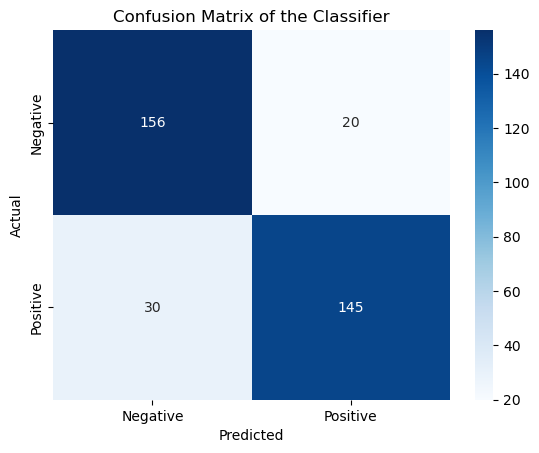

In [21]:
visual_cm(y_test, model_pred, labels=["Negative", "Positive"]) #visualizing confusion matrix for Log_reg

### Decision Tree

In [22]:
# instantiating a classification tree
tree_model = DecisionTreeClassifier(max_depth        = 3,
                                    random_state     = 708)

In [23]:
# using the classification_summary function
y_test, model_pred =classification_summary(x,
                       y,
                       model      = tree_model,
                       model_name = "Full Tree")


    Results for Full Tree
    Model Type: DecisionTreeClassifier(max_depth=3, random_state=708)
    Training Samples: 1050 
    Testing  Samples: 351
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.848
    AUC (Test) : 0.8121
    TT Gap     : 0.0359
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 133
    False Positives: 43
    False Negatives: 23
    True Positives : 152
    


In [24]:
results_df = pd.read_excel("./model_results/Model_Coefficients.xlsx") #saving result to the file
display(results_df) 

,Model Name,train_auc,test_auc,tt_gap
0,Logistic Regression,0.8704,0.8575,0.0129
1,Full Tree,0.8480,0.8121,0.0359


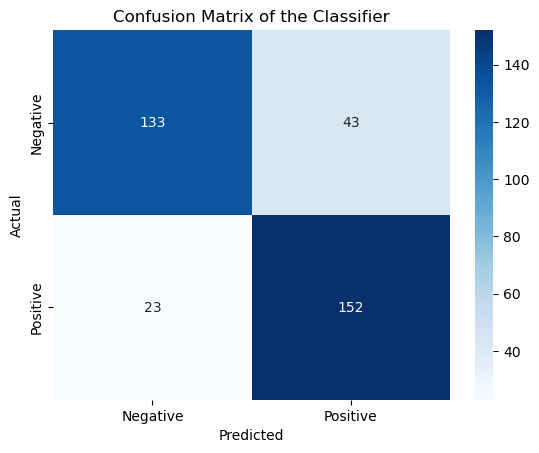

In [25]:
visual_cm(y_test, model_pred, labels=["Negative", "Positive"]) #visualizing confusion matrix for Decision Tree

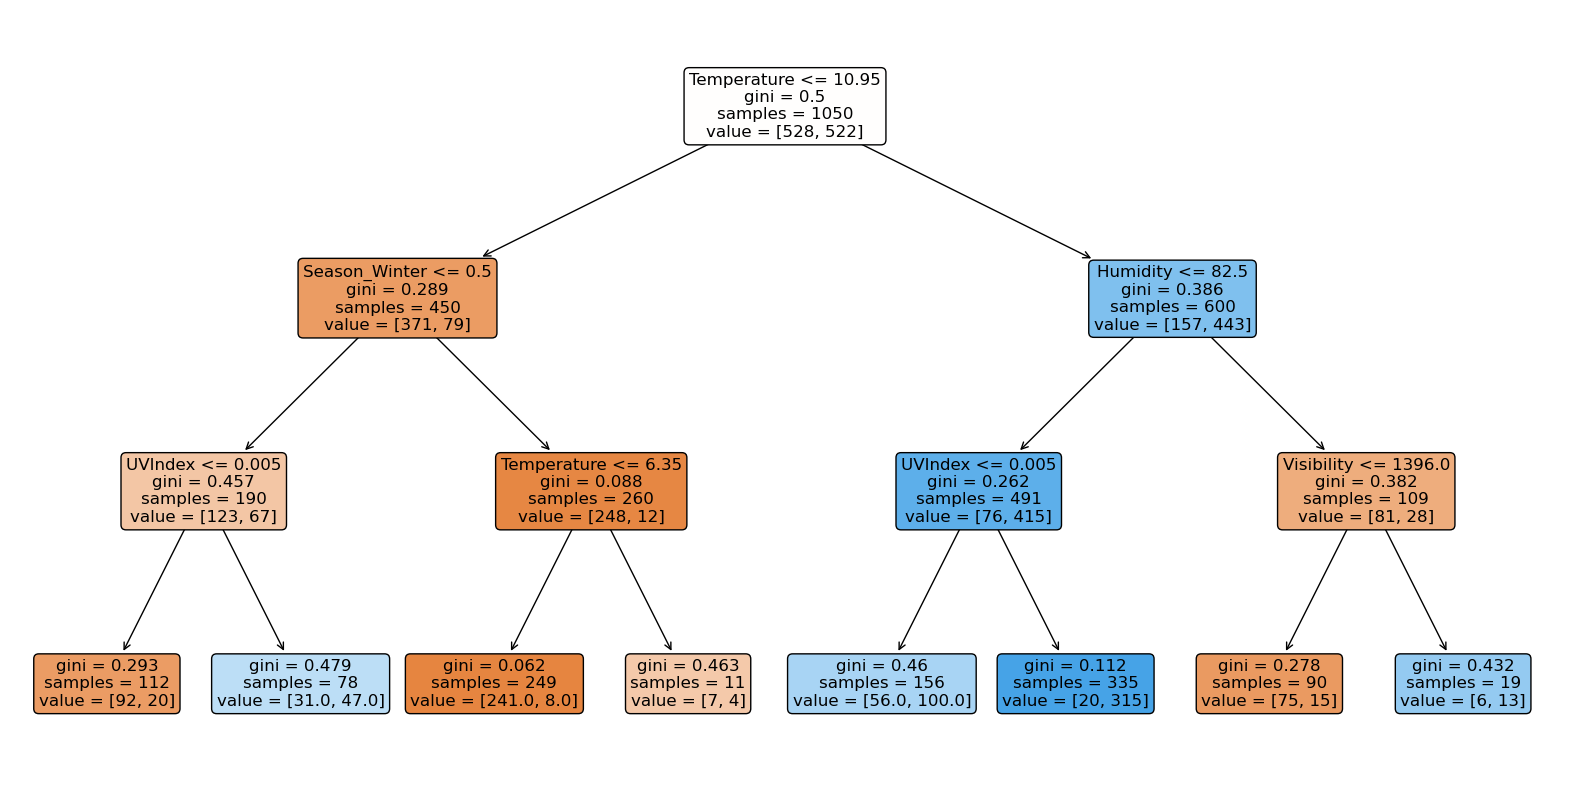

In [26]:
#Visualizing Decision tree classification
# setting figure size
plt.figure(figsize=(20,10))


# developing a plotted tree
plot_tree(decision_tree = tree_model, 
          feature_names = x.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 12)


# rendering the plot
plt.show()

### GBM

In [27]:
# Instantiate the GBM model
gbm_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1, # Step size (default 0.1)
    max_depth=3,       # Limits depth to prevent overfitting
    random_state=708
)

In [28]:
y_test, model_pred=classification_summary(x, y, 
                       model=gbm_model,
                       model_name="Gradient Boosting Model")



    Results for Gradient Boosting Model
    Model Type: GradientBoostingClassifier(random_state=708)
    Training Samples: 1050 
    Testing  Samples: 351
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.9457
    AUC (Test) : 0.8631
    TT Gap     : 0.0826
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 158
    False Positives: 18
    False Negatives: 30
    True Positives : 145
    


In [29]:
results_df = pd.read_excel("./model_results/Model_Coefficients.xlsx") #saving result to the file
display(results_df)  

,Model Name,train_auc,test_auc,tt_gap
0,Logistic Regression,0.8704,0.8575,0.0129
1,Full Tree,0.8480,0.8121,0.0359
2,Gradient Boosting Model,0.9457,0.8631,0.0826


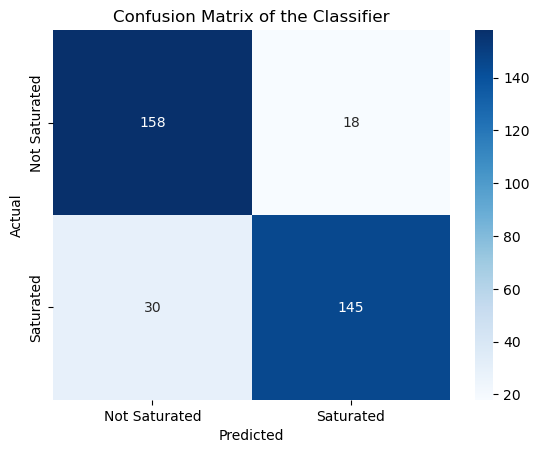

In [30]:
visual_cm(y_test, model_pred, labels=["Not Saturated", "Saturated"]) # Visualize the confusion matrix for GBM

### Random Forest

In [31]:
rf_model = RandomForestClassifier(max_depth=5, random_state=708)

In [32]:
y_test, model_pred=classification_summary(x, 
                       y, 
                       model=rf_model, 
                       model_name="Random Forest")



    Results for Random Forest
    Model Type: RandomForestClassifier(max_depth=5, random_state=708)
    Training Samples: 1050 
    Testing  Samples: 351
    
    
    Summary Statistics
    ------------------
    AUC (Train): 0.8858
    AUC (Test) : 0.8518
    TT Gap     : 0.034
    
    
    Confusion Matrix (test set)
    ---------------------------
    True Negatives : 151
    False Positives: 25
    False Negatives: 27
    True Positives : 148
    


In [33]:
results_df = pd.read_excel("./model_results/Model_Coefficients.xlsx") # saving result
display(results_df)  

,Model Name,train_auc,test_auc,tt_gap
0,Logistic Regression,0.8704,0.8575,0.0129
1,Full Tree,0.8480,0.8121,0.0359
2,Gradient Boosting Model,0.9457,0.8631,0.0826
3,Random Forest,0.8858,0.8518,0.0340


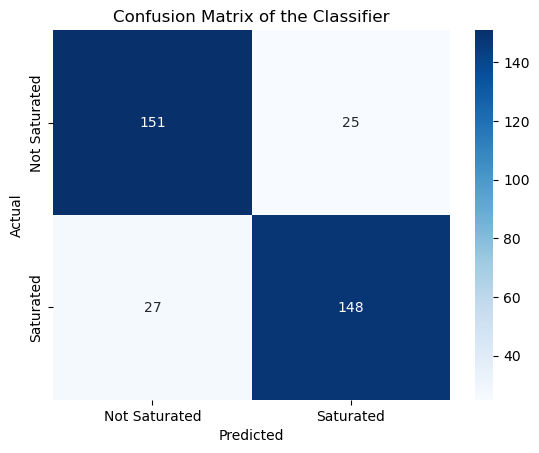

In [34]:
visual_cm(y_test, model_pred , labels=["Not Saturated", "Saturated"]) # Visualizing confusion matrix for random forest

## Best model Selection based on the train and test gap

In [35]:
# The best model: lowest tt_gap, highest test_auc
best_model = results_df.sort_values(by=['tt_gap',
                                        'test_auc'],
                                    ascending=[True, False]).iloc[0]

# Display the best model
print("Best Candidate Model:")
display(best_model.to_frame().T)

#But is it really the best model?

Best Candidate Model:


,Model Name,train_auc,test_auc,tt_gap
0,Logistic Regression,0.8704,0.8575,0.0129
